## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [136]:
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


boston = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
X = boston.drop(columns = ['medv']).copy()
y = boston[['medv']]

In [5]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [6]:
y.head()

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [7]:
# verificar base de dados (tipo das colunas e dados faltantes)
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [105]:
# separar dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2402)

In [106]:
# criar e treinar a árvore

regr = DecisionTreeRegressor(max_depth=8, random_state=2402)
regr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, random_state=2402)

In [107]:
# calcular MSE da árvore para os dados de treino 

mse_train = regr.score(X_train, y_train)

print(round(mse_train, 2))

0.98


In [108]:
# criar um dataframe com os dados de y_train e os dados preditos pela árvore

df = pd.DataFrame(data=regr.predict(X_train), 
                  columns=['Valor predito do imóvel na base de treinamento'])
pd.concat(objs=[y_train.reset_index(drop=True), df], axis=1)

,medv,Valor predito do imóvel na base de treinamento
0,24.6,23.966667
1,23.8,23.966667
2,12.3,12.400000
3,19.2,21.180000
4,27.9,27.966667
...,...,...
349,32.0,29.257143
350,17.1,17.100000
351,20.4,20.137500
352,19.4,19.033333


### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [109]:
# caminhos indicados pelos CCP-alfas 

path = regr.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.00000000e+00, 1.88323917e-05, 5.64971751e-05, 1.69491525e-04,
        2.25988701e-04, 3.53107345e-04, 5.08474576e-04, 6.77966102e-04,
        6.77966102e-04, 6.92090395e-04, 1.70903955e-03, 1.70903955e-03,
        2.03389831e-03, 3.18267420e-03, 3.25423729e-03, 3.73728814e-03,
        4.08192090e-03, 4.55743879e-03, 4.55743879e-03, 4.76694915e-03,
        4.77401130e-03, 5.20009416e-03, 5.44256121e-03, 6.61252354e-03,
        7.23163842e-03, 7.91902072e-03, 9.94713479e-03, 1.04001883e-02,
        1.50536723e-02, 1.58509887e-02, 1.99246704e-02, 2.46101695e-02,
        2.50894539e-02, 2.61158192e-02, 2.65222850e-02, 2.70529661e-02,
        2.72128060e-02, 3.22269303e-02, 3.24340866e-02, 3.30509259e-02,
        3.56241440e-02, 4.11365348e-02, 4.23631961e-02, 4.61440678e-02,
        4.93304412e-02, 5.03225047e-02, 5.19120763e-02, 5.22622411e-02,
        5.52268447e-02, 6.15254237e-02, 6.17274684e-02, 6.61252354e-02,
        7.00956106e-02, 7.94491525e-02, 8.41058537

Text(0, 0.5, 'Impureza total das folhas')

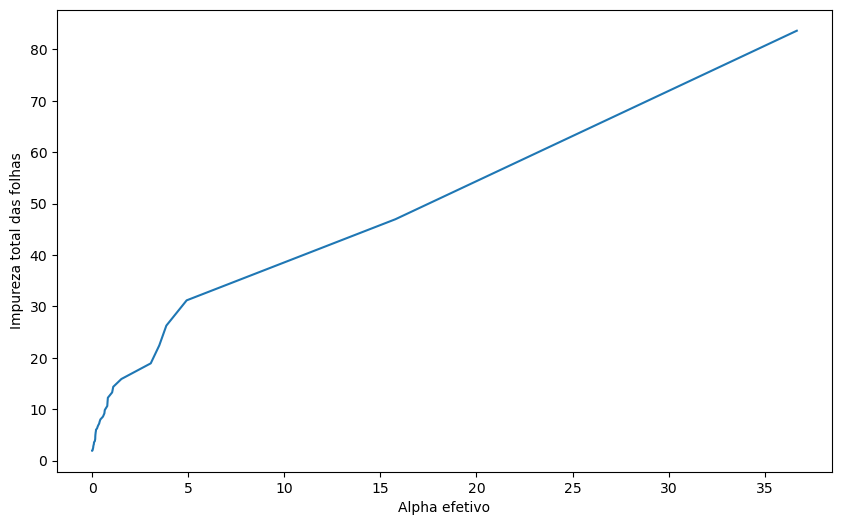

In [110]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("Alpha efetivo")
plt.ylabel("Impureza total das folhas")

### 3. Para cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [111]:
trees = [] # lista para guardar árvores criadas

for alpha in ccp_alphas:
    tree = DecisionTreeRegressor(random_state=2402, ccp_alpha=alpha) # criar árvore
    tree = tree.fit(X_train, y_train) # treinar árvore
    trees.append(tree) # incluir árvore na lista
    

trees

[DecisionTreeRegressor(random_state=2402),
 DecisionTreeRegressor(ccp_alpha=1.8832391713971378e-05, random_state=2402),
 DecisionTreeRegressor(ccp_alpha=5.649717513862236e-05, random_state=2402),
 DecisionTreeRegressor(ccp_alpha=0.00016949152542365496, random_state=2402),
 DecisionTreeRegressor(ccp_alpha=0.0002259887005647662, random_state=2402),
 DecisionTreeRegressor(ccp_alpha=0.0003531073446326078, random_state=2402),
 DecisionTreeRegressor(ccp_alpha=0.0005084745762707239, random_state=2402),
 DecisionTreeRegressor(ccp_alpha=0.0006779661016949008, random_state=2402),
 DecisionTreeRegressor(ccp_alpha=0.0006779661016954227, random_state=2402),
 DecisionTreeRegressor(ccp_alpha=0.0006920903954803191, random_state=2402),
 DecisionTreeRegressor(ccp_alpha=0.0017090395480224897, random_state=2402),
 DecisionTreeRegressor(ccp_alpha=0.0017090395480271463, random_state=2402),
 DecisionTreeRegressor(ccp_alpha=0.002033898305082896, random_state=2402),
 DecisionTreeRegressor(ccp_alpha=0.003182674

Text(0, 0.5, 'Profundidade da árvore')

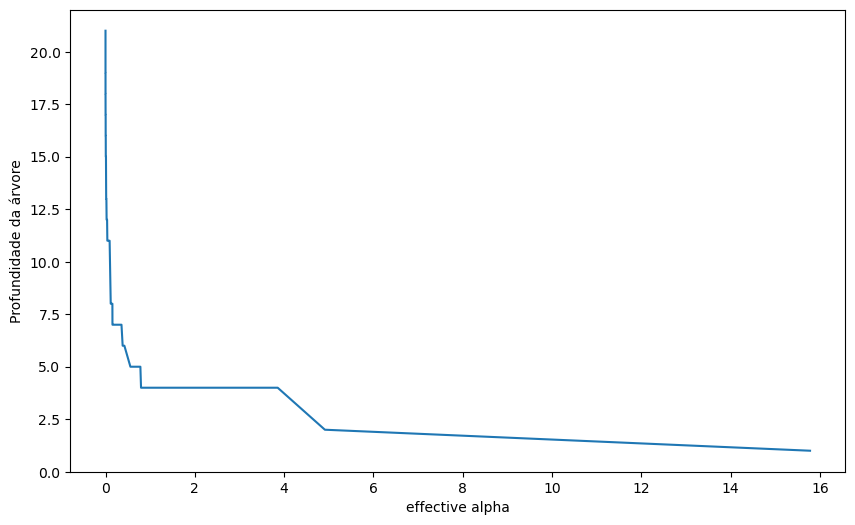

In [112]:
tree_depths = [tree.tree_.max_depth for tree in trees]
plt.figure(figsize=(10,  6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Profundidade da árvore")

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [113]:
train_scores = [mean_squared_error(y_train , tree.predict(X_train)) for tree in trees]
test_scores  = [mean_squared_error(y_test  , tree.predict(X_test )) for tree in trees]

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

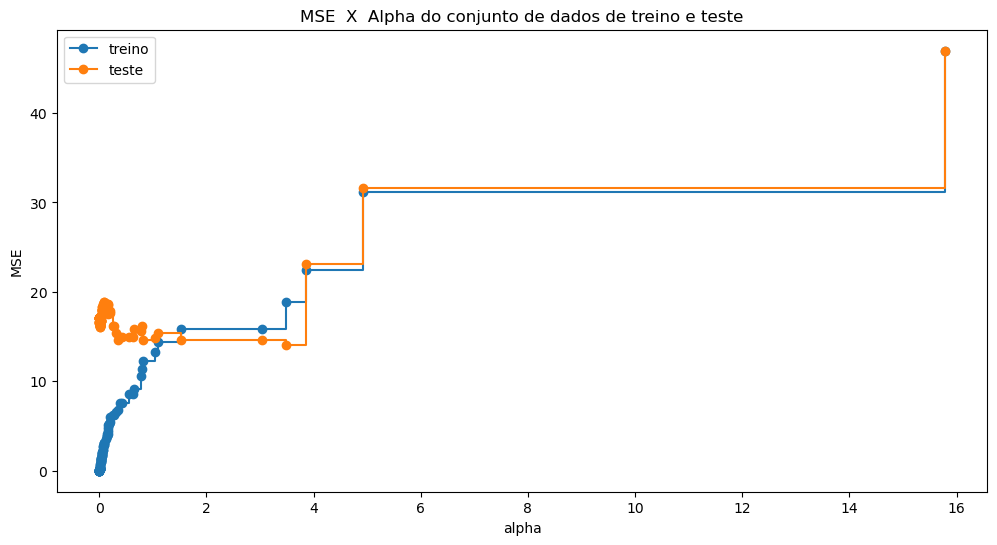

In [116]:
fig, ax = plt.subplots(figsize=(12,6))

ax.set_xlabel(xlabel='alpha')
ax.set_ylabel(ylabel='MSE')
ax.set_title(label='MSE  X  Alpha do conjunto de dados de treino e teste')

ax.plot(ccp_alphas[:-1], train_scores[:-1], 
        marker='o', label='treino', drawstyle='steps-post')

ax.plot(ccp_alphas[:-1], test_scores[:-1], 
        marker='o', label='teste', drawstyle='steps-post')

ax.legend()

plt.show()

In [126]:
# dataframe com os MSEs e os alphas
df = pd.DataFrame(data={'ccp_alphas':ccp_alphas, 
                        'train_scores':train_scores, 
                        'test_scores':test_scores})

df.sort_values(by=['test_scores']) # ordenando pelo menor MSE

,ccp_alphas,train_scores,test_scores
86,3.488233,18.919138,14.058252
73,0.357919,6.834382,14.566947
81,0.812656,12.231003,14.582596
85,3.044477,15.874661,14.603770
84,1.515934,15.874661,14.603770
...,...,...,...
54,0.084106,2.831875,18.820013
87,3.856790,22.407370,23.166895
88,4.913903,31.178063,31.585263
89,15.780762,46.958825,46.926825


In [127]:
ccp_alpha_min = df.sort_values(by=['test_scores']).iloc[0,0]
ccp_alpha_min

3.488232515196491

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [130]:
# criando e treinando a árvore que apresenta o ccp_alpha_min

final_tree = DecisionTreeRegressor(ccp_alpha=ccp_alpha_min, random_state=2402)
final_tree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=3.488232515196491, random_state=2402)

In [133]:
# calculando o R-quadradrado

r_quadrado = final_tree.score(X_train, y_train)
round(r_quadrado, 2)

0.77

### 7. Visualize esta árvore.

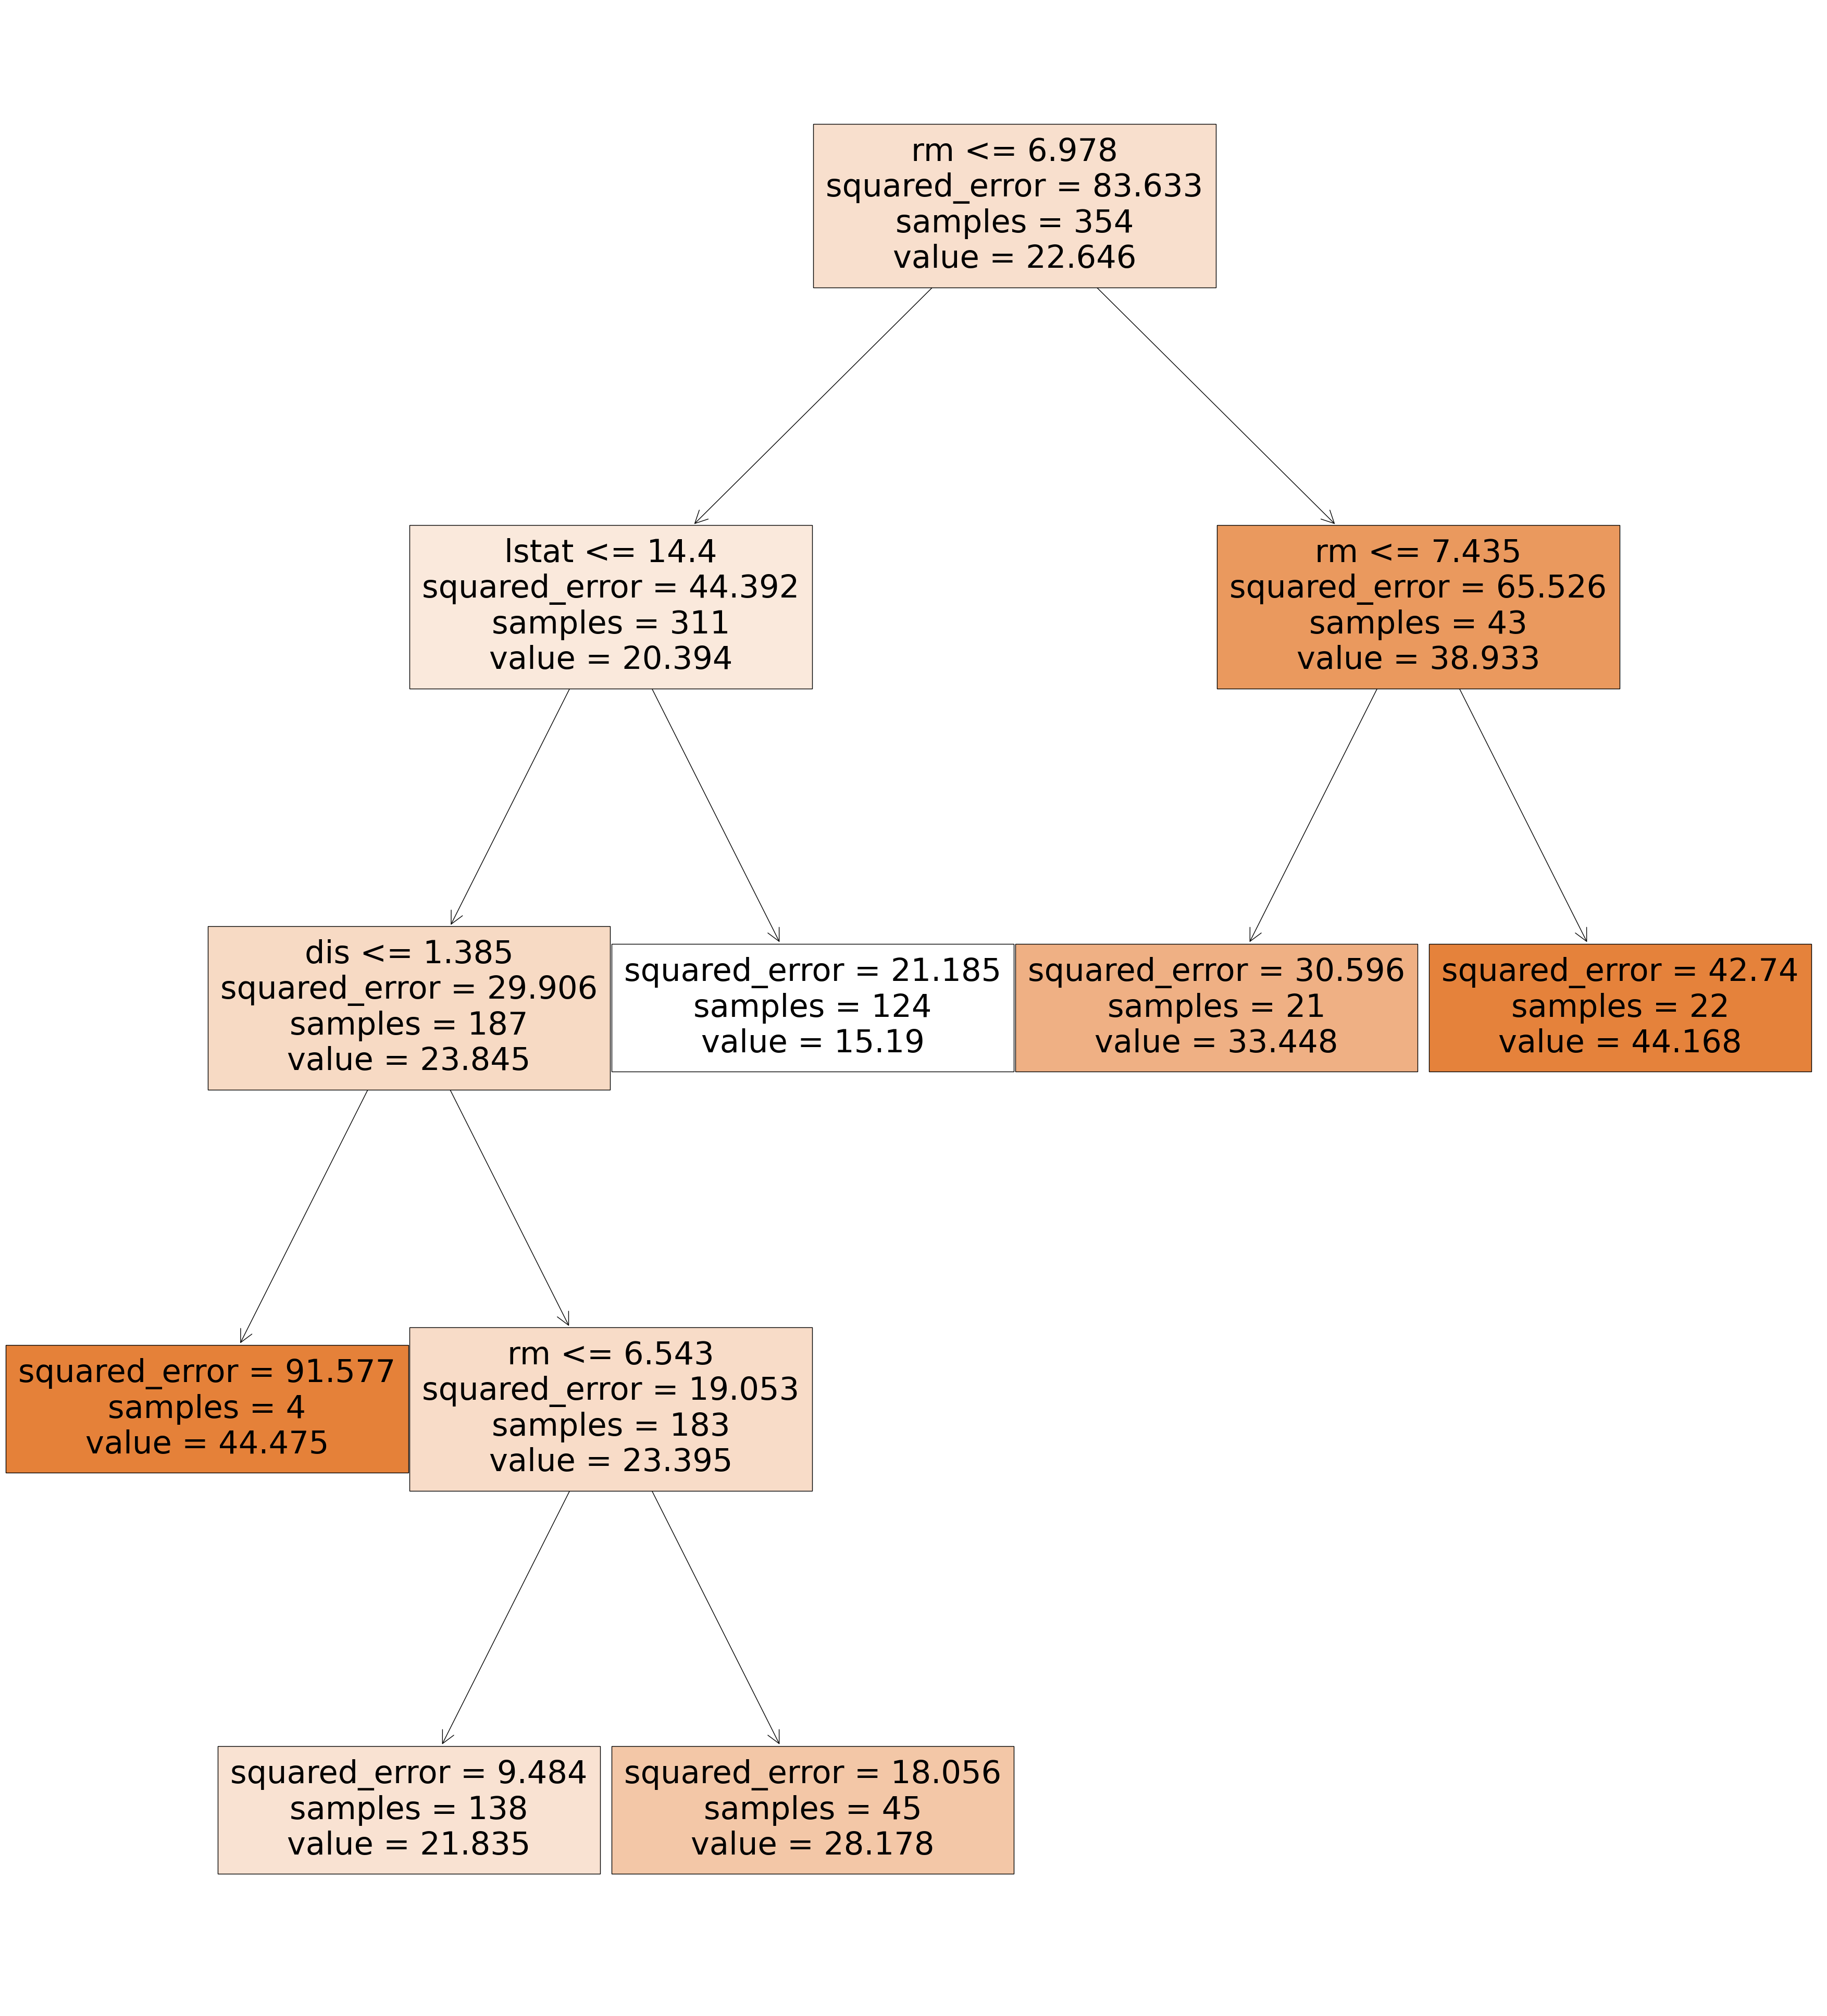

In [153]:
plt.rc('figure', figsize=(45,50))

tree.plot_tree(final_tree,
               feature_names=X.columns,
               filled=True);